<a href="https://colab.research.google.com/github/samsuy0304/PHSX815_HW11/blob/main/HW12/HW12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

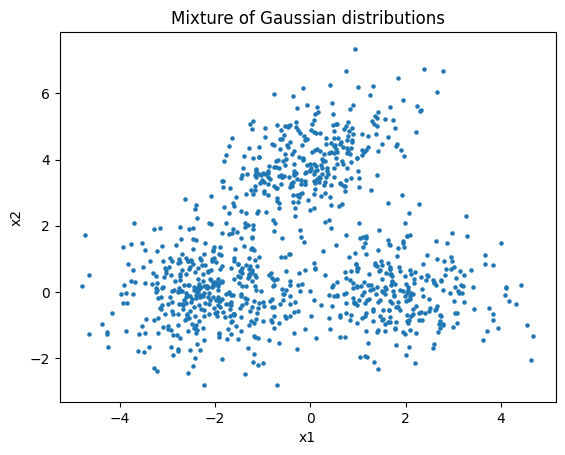

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data from a mixture of Gaussian distributions
n = 1000  # number of observations
k = 3  # number of mixture components
true_means = np.array([[-2, 0], [2, 0], [0, 4]])
true_covs = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0.5], [0.5, 1]]])
true_mixing_probs = np.array([0.4, 0.3, 0.3])
z = np.random.choice(k, size=n, p=true_mixing_probs)
X = np.zeros((n, 2))
for i in range(n):
    X[i] = np.random.multivariate_normal(true_means[z[i]], true_covs[z[i]])

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("Mixture of Gaussian distributions")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

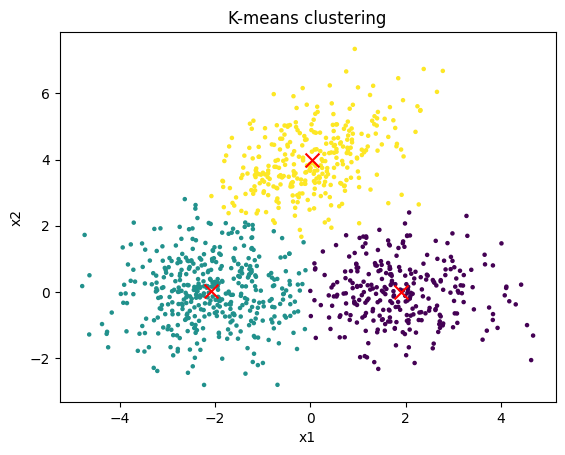

In [2]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Visualize the clustering
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
plt.title("K-means clustering")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [6]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(z, labels)
print(f"Adjusted Rand index: {ari}")

Adjusted Rand index: 0.9038689228139196
